In [ ]:
!mkdir -p ~/.kaggle
from google.colab import drive
from google.colab import files
# Upload your kaggle.json API key
uploaded = files.upload()

drive.mount('/content/drive')

Saving kaggle.json to kaggle.json
Mounted at /content/drive


In [ ]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine-learning'

NameError: ignored

In [ ]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers import Dropourt
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print("import ok")

import ok


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine-learning/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
y = data['label']
x = data.drop(columns = ['label'])
len(x )

10015

In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/Machine-learning/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
classes

{4: ('nv', ' melanocytic nevi'),
 6: ('mel', 'melanoma'),
 2: ('bkl', 'benign keratosis-like lesions'),
 1: ('bcc', ' basal cell carcinoma'),
 5: ('vasc', ' pyogenic granulomas and hemorrhage'),
 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
 3: ('df', 'dermatofibroma')}

#Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


#Standardization and Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

#Model Training

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1728)              0

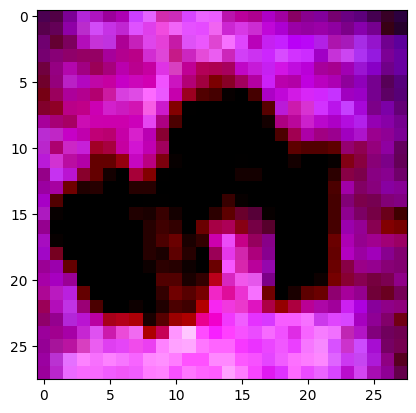

In [ ]:
model = Sequential()
model.add(Conv2D(32,  kernel_size = (3,3), input_shape = (28, 28, 3),  activation='relu', padding='same'))
model.add(Dropout(0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(700, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()
image = X_train[200]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer =  'RMSprop',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.1,
                    batch_size = 450,
                    epochs = 30,
                    callbacks=[callback])

Epoch 1/30
76/76 [==============================] - ETA: 0s - loss: 1.4101 - accuracy: 0.4663
Epoch 1: saving model to best_model.h5
76/76 [==============================] - 72s 943ms/step - loss: 1.4101 - accuracy: 0.4663 - val_loss: 1.0777 - val_accuracy: 0.6056
Epoch 2/30
76/76 [==============================] - ETA: 0s - loss: 0.9523 - accuracy: 0.6498
Epoch 2: saving model to best_model.h5
76/76 [==============================] - 55s 720ms/step - loss: 0.9523 - accuracy: 0.6498 - val_loss: 0.9980 - val_accuracy: 0.6112
Epoch 3/30
76/76 [==============================] - ETA: 0s - loss: 0.6879 - accuracy: 0.7542
Epoch 3: saving model to best_model.h5
76/76 [==============================] - 60s 773ms/step - loss: 0.6879 - accuracy: 0.7542 - val_loss: 0.7665 - val_accuracy: 0.6956
Epoch 4/30
76/76 [==============================] - ETA: 0s - loss: 0.5098 - accuracy: 0.8168
Epoch 4: saving model to best_model.h5
76/76 [==============================] - 55s 724ms/step - loss: 0.5098 -

In [ ]:

loss, accuracy = model.evaluate(X_test, Y_test, verbose = 0)
print("Accuracy: ", accuracy*100)


Accuracy:  98.26355576515198


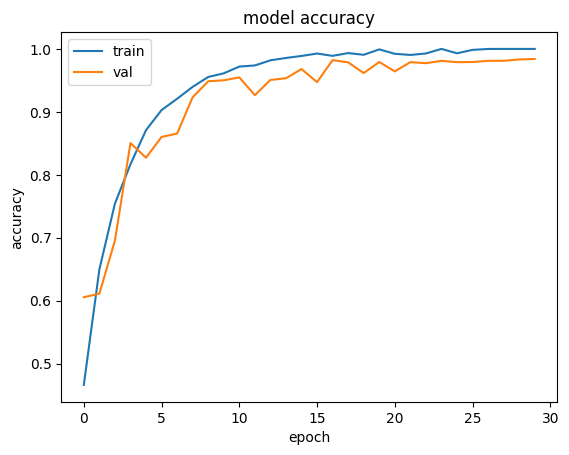

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

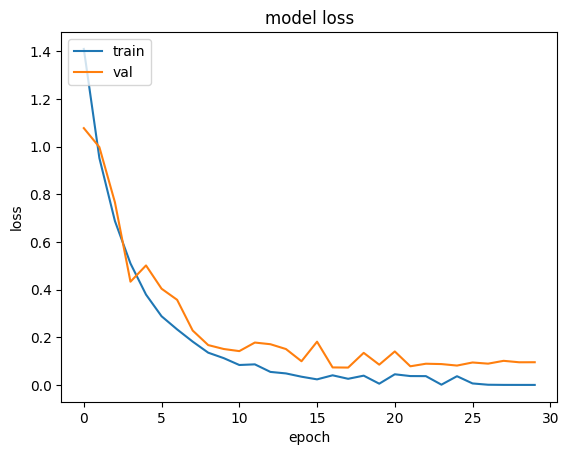

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
model.load_weights('best_model.h5')

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 5s - loss: 0.1086 - accuracy: 0.9826 - 5s/epoch - 16ms/step


294/294 [==============================] - 4s 13ms/step


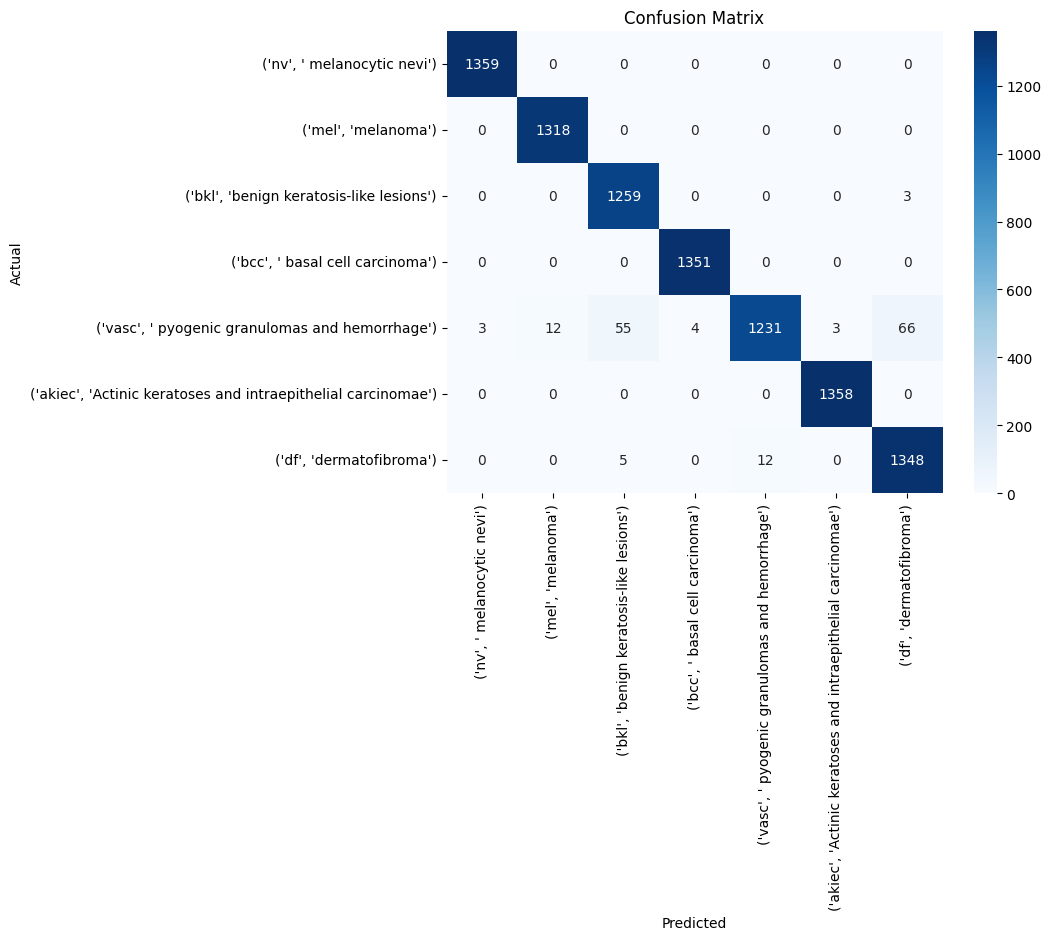

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes.values(), yticklabels=classes.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import cv2

In [ ]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels (y_pred) and true labels (Y_test)
# Convert y_pred probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the F1-score
f1 = f1_score(Y_test, y_pred_classes, average='weighted')
print("F1-score:", f1)

F1-score: 0.9823855771124579


In [ ]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels (y_pred) and true labels (Y_test)
# Convert y_pred probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the F1-score for each class
class_f1_scores = f1_score(Y_test, y_pred_classes, average=None)

# Print the F1-score for each class
for class_idx, f1_score_class in enumerate(class_f1_scores):
    class_name = classes[class_idx]  # Replace with your class names
    print(f"F1-score for {class_name}: {f1_score_class}")


F1-score for ('akiec', 'Actinic keratoses and intraepithelial carcinomae'): 0.9988974641675854
F1-score for ('bcc', ' basal cell carcinoma'): 0.9954682779456193
F1-score for ('bkl', 'benign keratosis-like lesions'): 0.9755908562572647
F1-score for ('df', 'dermatofibroma'): 0.9985218033998522
F1-score for ('nv', ' melanocytic nevi'): 0.9407718761941154
F1-score for ('vasc', ' pyogenic granulomas and hemorrhage'): 0.9988966531813167
F1-score for ('mel', 'melanoma'): 0.9690869877785766


In [ ]:

from google.colab.patches import cv2_imshow
srcdir = '/content/gdrive/MyDrive/Colab-Notebooks/disease-class/data-set/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break

FileNotFoundError: ignored